In [22]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import kwant

s0 = np.eye(2)
sx = np.array([[0.0,1.0],
               [1.0,0.0]])
sy = np.array([[0.0,-1.0j],
               [1.0j,0.0]])
sz = np.array([[1.0,0.0],
               [0.0,-1.0]])

In [23]:
## Defining the Chern insulator Hamiltonian with OBC in x as in Eq. (1) in main text (Assume lattice constant a=1)
def finCI(L,ky,M,t,delta):
    lat = kwant.lattice.chain(norbs=2)
    sys = kwant.Builder()

    for i in range(L):
        sys[lat(i)] = (M-2*t*np.cos(ky))*sz+2*delta*np.sin(ky)*sy 
        if i>0:
            sys[lat(i),lat(i-1)] = -t*sz+1j*delta*sx 

    return sys.finalized()

## Analytic hybridization expression shown in Eq. 12 and derived in Appendix
def hybr0(L,M,t,delta):
    m = M-2*t
    R = np.sqrt((t-delta)/(t+delta))
    theta = np.arccos(m/(2*np.sqrt(t**2-delta**2)))

    return (t+delta)*R**(L+2)*np.sin(theta)*np.sin((L+1)*theta)

## Box normalization squared for wavefunction in thin film: N^2 = \sum_{x=1}^{L}|\psi(x)|^2
def Norm2psi(L,M,t,delta):
    m = M-2*t
    R = np.sqrt((t-delta)/(t+delta))
    theta = np.arccos(m/(2*np.sqrt(t**2-delta**2)))
    xsum = np.array([R**(2*i)*np.sin(i*theta)**2 for i in range(1,L+1)])
    Norm2 = np.sum(xsum)

    return Norm2  

In [24]:
## Parameters used
L = 6       ## No. of lattice sites in thin film                    
ky = 0.0    ## TRIM point
t = 1.0; delta = 0.22
Mlist = np.linspace(-1,5,301)  ## varied as a function of M

energyvsM0 = np.array([sp.linalg.eigvalsh(finCI(L,ky,Mi,t,delta).hamiltonian_submatrix()) for Mi in Mlist])

In [25]:
## Position of M for zero hybridization according to Eq. 13  
Mnodes0 = np.array([2*np.sqrt(t**2-delta**2)*np.cos(ni*np.pi/(L+1)) for ni in range(1,L+1)])+2*t

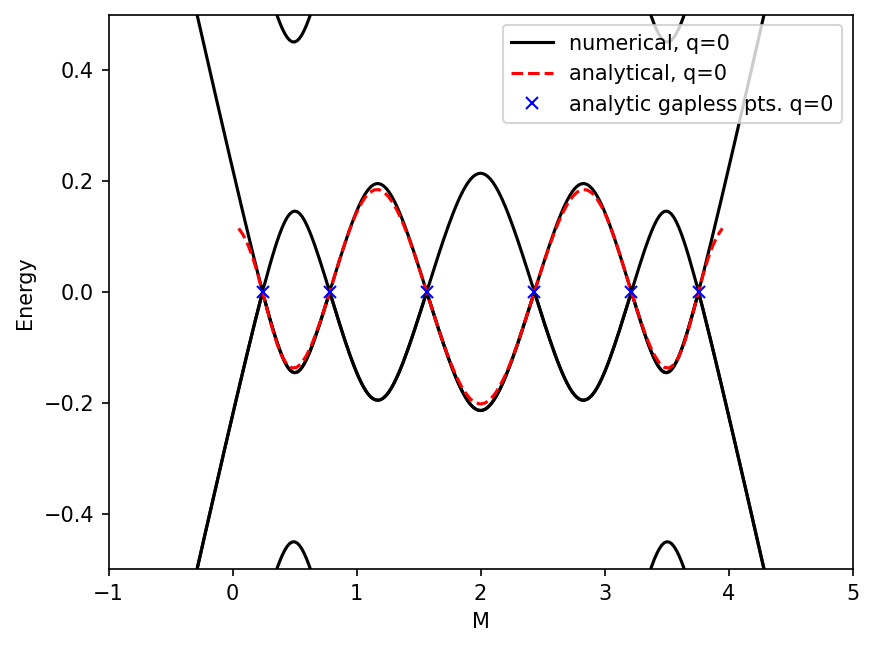

In [26]:
fig = plt.figure(dpi=150)

## Numerical spectra 
for i in range(2*L):
    plt.plot(Mlist,energyvsM0[:,i],'-k')

plt.plot(Mlist,energyvsM0[:,L-1],'-k',label='numerical, q=0')

## Analytical spectra
MlistA = np.linspace(0.05,3.95,101) ## restricted M list, analytic expression not defined approximately outside this range

normL = np.array([Norm2psi(L,mi,t,delta) for mi in MlistA]) ## normalization as a function of M

plt.plot(MlistA,hybr0(L,MlistA,t,delta)/normL,'--r',label='analytical, q=0') ## Analytical spectra as a function of M to compare with numerics

## Plotting only hybridization zero M points
plt.plot(Mnodes0,np.zeros(L),'bx',label='analytic gapless pts. q=0')

plt.xlim([-1,5])
plt.ylim([-0.5,0.5])
plt.xlabel('M')
plt.ylabel('Energy')
plt.legend(loc='upper right')

#plt.savefig('fciL6t1del0p22ky0vsM.pdf')
plt.show()